In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Machine learning packages
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# reading data from csv and creating a dataframe
df = pd.read_csv('Google-Playstore.csv')

# dataframe dimensions
print(f"This dataframe has {df.shape[0]} rows and {df.shape[1]} columns.")

This dataframe has 603047 rows and 23 columns.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603047 entries, 0 to 603046
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   App Name           603046 non-null  object 
 1   App Id             603047 non-null  object 
 2   Category           603047 non-null  object 
 3   Rating             599287 non-null  float64
 4   Rating Count       599287 non-null  float64
 5   Installs           602875 non-null  object 
 6   Minimum Installs   602875 non-null  float64
 7   Maximum Installs   603047 non-null  int64  
 8   Free               603047 non-null  bool   
 9   Price              603047 non-null  float64
 10  Currency           602866 non-null  object 
 11  Size               603047 non-null  object 
 12  Minimum Android    602556 non-null  object 
 13  Developer Id       603045 non-null  object 
 14  Developer Website  423783 non-null  object 
 15  Developer Email    603010 non-null  object 
 16  Re

In [4]:
#Drop unnecessary variables: Deveopler Website, Developer Id, Developer Email, Privacy Policy
df = df.drop(['Developer Id', 'Developer Website', 'Developer Email', 'Privacy Policy'], axis = 1)

## Missing values summary

In [5]:
# missing values summary
pd.DataFrame(zip(df.columns,
                 df.isna().any(),
                 df.isna().sum()\
                     / df.shape[0]\
                     * 100),
            columns=['Column', 'Has Missing Values?', '% Missing Values'])\
    .sort_values('% Missing Values', ascending=False)

,Column,Has Missing Values?,% Missing Values
13,Released,True,5.352485
3,Rating,True,0.623500
4,Rating Count,True,0.623500
12,Minimum Android,True,0.081420
10,Currency,True,0.030014
5,Installs,True,0.028522
6,Minimum Installs,True,0.028522
0,App Name,True,0.000166
17,In App Purchases,False,0.000000
16,Ad Supported,False,0.000000


## Data Cleaning Summary:
* Attribute: Category  - recategorized into 10 categories and new dummy columns created
* Attribute: Size  - removed cahracters like 'm', 'k', ',', '.' . All Mb is converted into kb's and the column is converted into numeric
* Attribute: Installs field is currently stored as string and has values like 1,000,000+, 1+. These values are categorized into 5 categories - 'Very Low' , 'Low', 'Medium', 'High', 'Very High'


### Category Variable

In [6]:
#Recategorizing all 48 categories into 10
#CATEGORY 1
lifestyle=['Beauty','Dating','Food&Drink','House&Home','Lifestyle','Music','Music&Audio',
           'Personalization','Photography','Parenting','Shopping','Social']
#CATEGORY 2
education=['Art&Design','Books&Reference','Education','Educational','Libraries&Demo']
#CATEGORY 3
health=['Health&Fitness','Medical']
#CATEGORY 4
travel=['Auto&Vehicles','Maps&Navigation','Travel&Local']
#CATEGORY 5
communication=['Communication']
#CATEGORY 6
news=['News&Magazines']
#CATEGORY 7
tools=['Tools','VideoPlayers&Editors','Word','Productivity']
#CATEGORY 8
weather=['Weather']
#CATEGORY 9
business=['Business','Finance']
#CATEGORY 10
entertainment = ['Entertainment','Action','Adventure','Arcade','Board','Comics','Card','Casino','Casual','Events',
                 'Puzzle','Racing','Role Playing','Simulation','Sports','Strategy','Trivia']

In [7]:
df.loc[df['Category'].isin(lifestyle), 'c_lifestyle'] = np.int64(1)
df['c_lifestyle'] = df['c_lifestyle'].replace(np.nan, np.int64(0))

df.loc[df['Category'].isin(education), 'c_education'] = np.int64(1)
df['c_education'] = df['c_education'].replace(np.nan, np.int64(0))

df.loc[df['Category'].isin(health), 'c_health'] = np.int64(1)
df['c_health'] = df['c_health'].replace(np.nan, np.int64(0))

df.loc[df['Category'].isin(travel), 'c_travel'] = np.int64(1)
df['c_travel'] = df['c_travel'].replace(np.nan, np.int64(0))

df.loc[df['Category'].isin(communication), 'c_communication'] = np.int64(1)
df['c_communication'] = df['c_communication'].replace(np.nan, np.int64(0))

df.loc[df['Category'].isin(news), 'c_news'] = np.int64(1)
df['c_news'] = df['c_news'].replace(np.nan, np.int64(0))

df.loc[df['Category'].isin(tools), 'c_tools'] = np.int64(1)
df['c_tools'] = df['c_tools'].replace(np.nan, np.int64(0))

df.loc[df['Category'].isin(weather), 'c_weather'] = np.int64(1)
df['c_weather'] = df['c_weather'].replace(np.nan, np.int64(0))

df.loc[df['Category'].isin(business), 'c_business'] = np.int64(1)
df['c_business'] = df['c_business'].replace(np.nan, np.int64(0))

df.loc[df['Category'].isin(entertainment), 'c_entertainment'] = np.int64(1)
df['c_entertainment'] = df['c_entertainment'].replace(np.nan, np.int64(0))

In [8]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,c_lifestyle,c_education,c_health,c_travel,c_communication,c_news,c_tools,c_weather,c_business,c_entertainment
0,foodpanda - Local Food & Grocery Delivery,com.global.foodpanda.android,Food & Drink,4.4,1258493.0,"10,000,000+",10000000.0,48828081,True,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Tripadvisor Hotel, Flight & Restaurant Bookings",com.tripadvisor.tripadvisor,Travel & Local,4.4,1360172.0,"100,000,000+",100000000.0,371284181,True,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Safeway Delivery & Pick Up,com.safeway.shop,Shopping,4.2,5532.0,"500,000+",500000.0,816102,True,0.00,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,My CookBook Ad-Free,fr.cookbookpro,Food & Drink,4.7,2531.0,"10,000+",10000.0,16171,False,5.99,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Talabat: Food & Grocery Delivery,com.talabat,Food & Drink,4.4,197649.0,"5,000,000+",5000000.0,9218590,True,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
print(df.c_lifestyle.value_counts())
print(df.c_health.value_counts())
print(df.c_travel.value_counts())
print(df.c_communication.value_counts())
print(df.c_news.value_counts())
print(df.c_tools.value_counts())
print(df.c_weather.value_counts())
print(df.c_business.value_counts())
print(df.c_entertainment.value_counts())

0.0    500232
1.0    102815
Name: c_lifestyle, dtype: int64
0.0    594682
1.0      8365
Name: c_health, dtype: int64
0.0    603047
Name: c_travel, dtype: int64
0.0    591278
1.0     11769
Name: c_communication, dtype: int64
0.0    603047
Name: c_news, dtype: int64
0.0    541275
1.0     61772
Name: c_tools, dtype: int64
0.0    600492
1.0      2555
Name: c_weather, dtype: int64
0.0    556005
1.0     47042
Name: c_business, dtype: int64
0.0    492704
1.0    110343
Name: c_entertainment, dtype: int64


## Size variable

In [10]:
#Remove Varies with Device from Size
df = df[df['Size'] != 'Varies with device']
kb_index = df.Size[df.Size.str.contains('k')].index
mb_index = df.Size[(df.Size.str.contains('M'))].index
#Remove M,k,, from the size variable
#df['Size'] = df['Size'].str.replace('.','')
df['Size'] = df['Size'].str.replace(',','')
df.Size = df.Size.str.replace('M','')
df.Size = df.Size.str.replace('k','')
df.Size = pd.to_numeric(df.Size,errors='coerce')
df.Size.loc[mb_index] = df.Size.loc[mb_index] * 1000

In [11]:
df.Size.value_counts()

11000.0     16960
12000.0     14280
13000.0     12196
14000.0     11249
16000.0     10784
            ...  
198000.0        1
347000.0        1
318000.0        1
225000.0        1
233000.0        1
Name: Size, Length: 1386, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577106 entries, 0 to 603046
Data columns (total 29 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   App Name          577105 non-null  object 
 1   App Id            577106 non-null  object 
 2   Category          577106 non-null  object 
 3   Rating            576880 non-null  float64
 4   Rating Count      576880 non-null  float64
 5   Installs          577049 non-null  object 
 6   Minimum Installs  577049 non-null  float64
 7   Maximum Installs  577106 non-null  int64  
 8   Free              577106 non-null  bool   
 9   Price             577106 non-null  float64
 10  Currency          577041 non-null  object 
 11  Size              577106 non-null  float64
 12  Minimum Android   576632 non-null  object 
 13  Released          549530 non-null  object 
 14  Last Updated      577106 non-null  object 
 15  Content Rating    577106 non-null  object 
 16  Ad Supported      57

In [13]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,c_lifestyle,c_education,c_health,c_travel,c_communication,c_news,c_tools,c_weather,c_business,c_entertainment
0,foodpanda - Local Food & Grocery Delivery,com.global.foodpanda.android,Food & Drink,4.4,1258493.0,"10,000,000+",10000000.0,48828081,True,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Safeway Delivery & Pick Up,com.safeway.shop,Shopping,4.2,5532.0,"500,000+",500000.0,816102,True,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,DoorDash - Food Delivery,com.dd.doordash,Food & Drink,4.5,784802.0,"10,000,000+",10000000.0,24426156,True,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Peapod Delivery,com.peapod.app.mobile.droid,Shopping,2.8,2487.0,"500,000+",500000.0,571969,True,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,FreshDirect,com.freshdirect.android,Shopping,2.1,893.0,"100,000+",100000.0,184884,True,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Installs variable

In [14]:
df['Installs'] = df['Installs'].str.replace('+','')
df['Installs'] = df['Installs'].str.replace(',','')
df.Installs = pd.to_numeric(df.Installs,errors='coerce')

## Currency Variable

In [15]:
df.Currency.value_counts()

USD    576945
XXX        60
EUR        13
GBP         5
UAH         3
INR         3
SGD         2
HKD         1
JPY         1
BRL         1
CAD         1
VND         1
KRW         1
RON         1
TRY         1
IDR         1
RUB         1
Name: Currency, dtype: int64

In [16]:
# remove apps other than US
df = df[df['Currency'] == 'USD']

## Release Variable

In [17]:
df.Released=pd.to_datetime(df.Released)
df['ReleaseMonth']= df['Released'].dt.month
df = df.dropna(subset=['ReleaseMonth'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549436 entries, 0 to 603046
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   App Name          549435 non-null  object        
 1   App Id            549436 non-null  object        
 2   Category          549436 non-null  object        
 3   Rating            549391 non-null  float64       
 4   Rating Count      549391 non-null  float64       
 5   Installs          549436 non-null  float64       
 6   Minimum Installs  549436 non-null  float64       
 7   Maximum Installs  549436 non-null  int64         
 8   Free              549436 non-null  bool          
 9   Price             549436 non-null  float64       
 10  Currency          549436 non-null  object        
 11  Size              549436 non-null  float64       
 12  Minimum Android   549003 non-null  object        
 13  Released          549436 non-null  datetime64[ns]
 14  Last

## Rating Variable

In [19]:
#number of rows
len(df)

549436

In [20]:
# Dropping rows having rating not between 1 and 5
df = df[(df.Rating>=1) & (df.Rating<=5)]

#number of rows
len(df)

399284

## Free Variable

In [21]:
len(df[(df['Free']==True) & (df['Price']>0)])

0

In [24]:
df['c_lifestyle'] = pd.Categorical(df.c_lifestyle)
df['c_education'] = pd.Categorical(df.c_education)
df['c_health'] = pd.Categorical(df.c_health)
df['c_travel'] = pd.Categorical(df.c_travel)
df['c_communication'] = pd.Categorical(df.c_communication)
df['c_news'] = pd.Categorical(df.c_news)
df['c_tools'] = pd.Categorical(df.c_tools)
df['c_weather'] = pd.Categorical(df.c_weather)
df['c_business'] = pd.Categorical(df.c_business)
df['c_entertainment'] = pd.Categorical(df.c_entertainment)
df['Free'] = pd.Categorical(df.Free)

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8bfcdb8460>


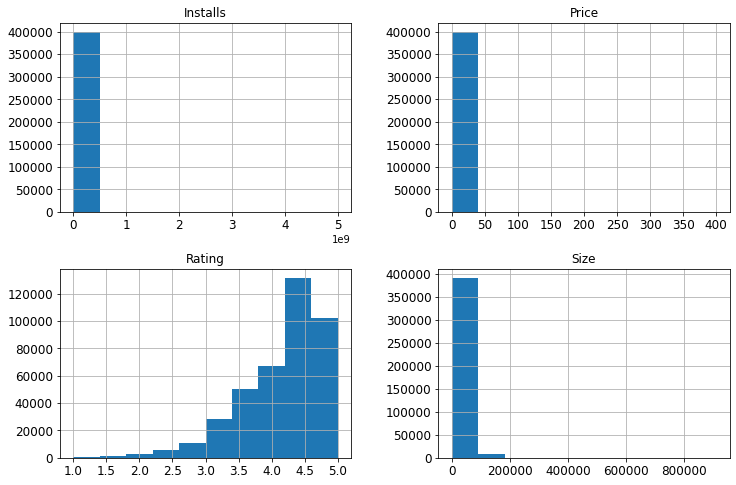

In [25]:
print(df.hist(['Rating','Size','Installs','Price'],figsize=(12,8),xlabelsize=12,ylabelsize=12))

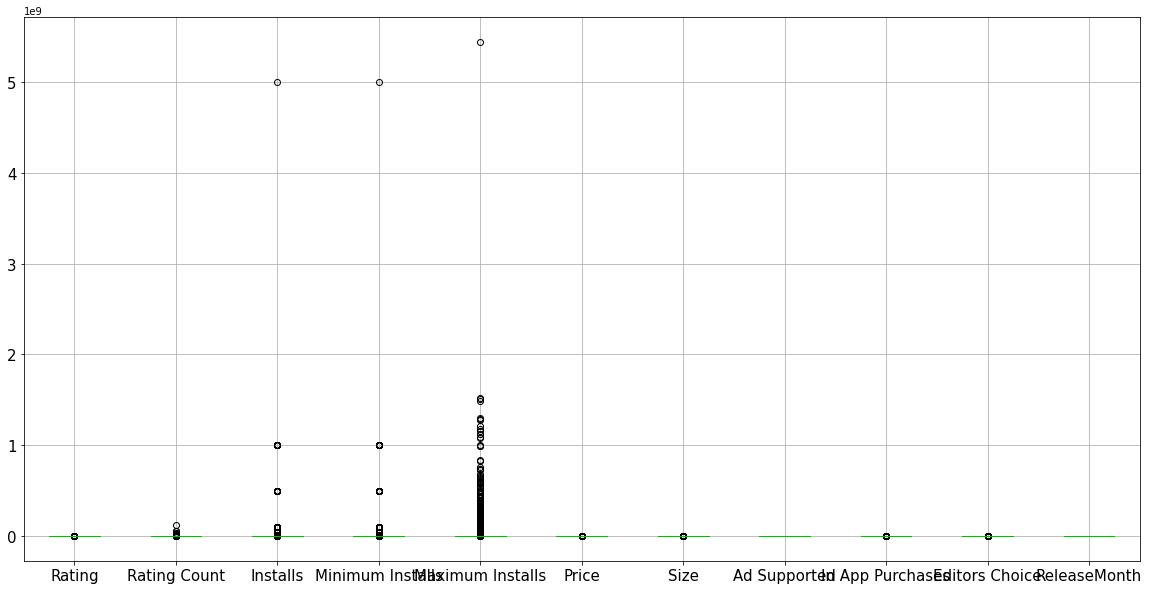

In [26]:
df.boxplot(fontsize=15,figsize=(20,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8bfd855250>]],
      dtype=object)

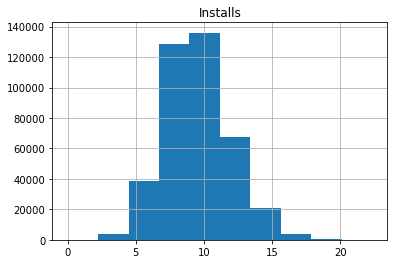

In [27]:
df.Installs=df.Installs.apply(func=np.log1p)

df.hist(column=['Installs'])

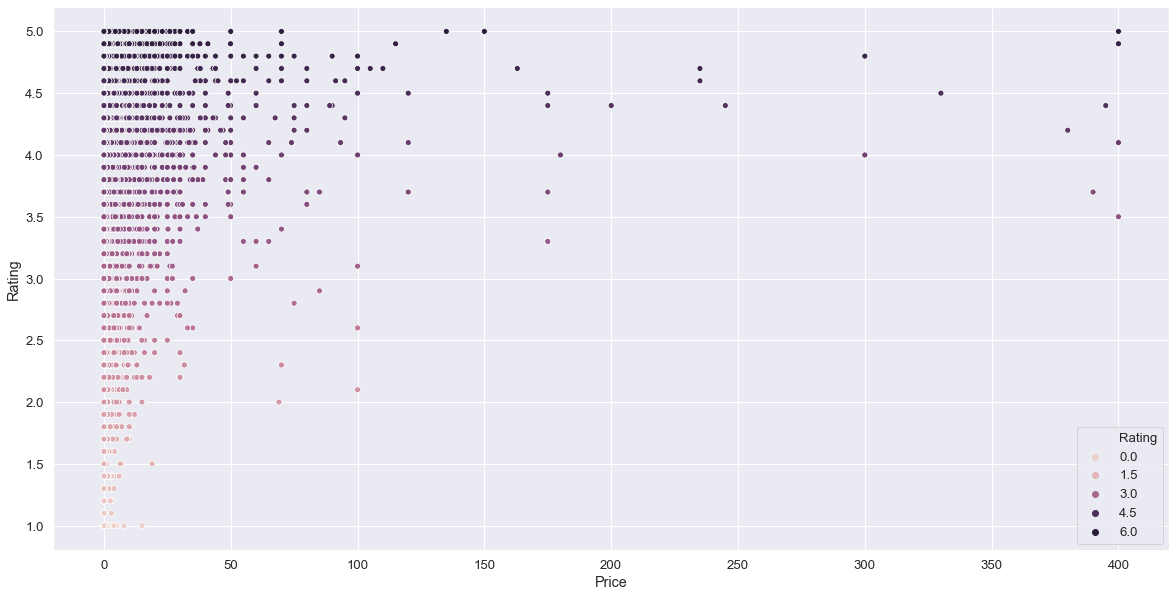

In [28]:
plt.figure(figsize=(20,10))
sns.set_style(style='whitegrid',)
sns.set(font_scale=1.2)
sns.scatterplot(df.Price,df.Rating,hue=df.Rating)

plt.show()

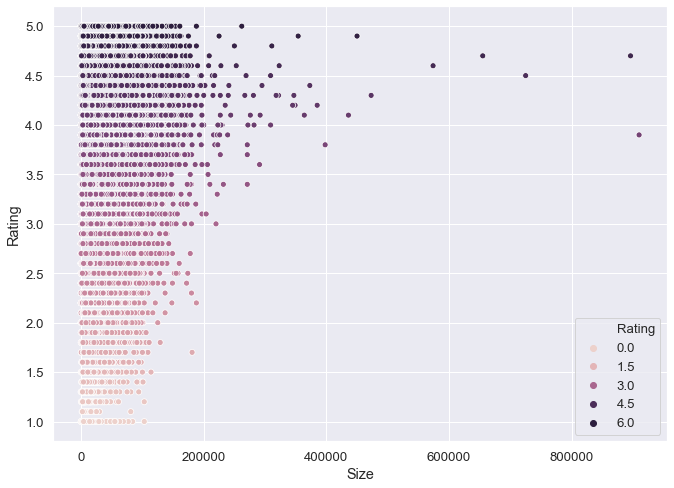

In [29]:
plt.figure(figsize=(11,8))
sns.scatterplot(df.Size,df.Rating,hue=df.Rating)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399284 entries, 0 to 603046
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   App Name          399283 non-null  object        
 1   App Id            399284 non-null  object        
 2   Category          399284 non-null  object        
 3   Rating            399284 non-null  float64       
 4   Rating Count      399284 non-null  float64       
 5   Installs          399284 non-null  float64       
 6   Minimum Installs  399284 non-null  float64       
 7   Maximum Installs  399284 non-null  int64         
 8   Free              399284 non-null  category      
 9   Price             399284 non-null  float64       
 10  Currency          399284 non-null  object        
 11  Size              399284 non-null  float64       
 12  Minimum Android   398998 non-null  object        
 13  Released          399284 non-null  datetime64[ns]
 14  Last

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c1078b280>


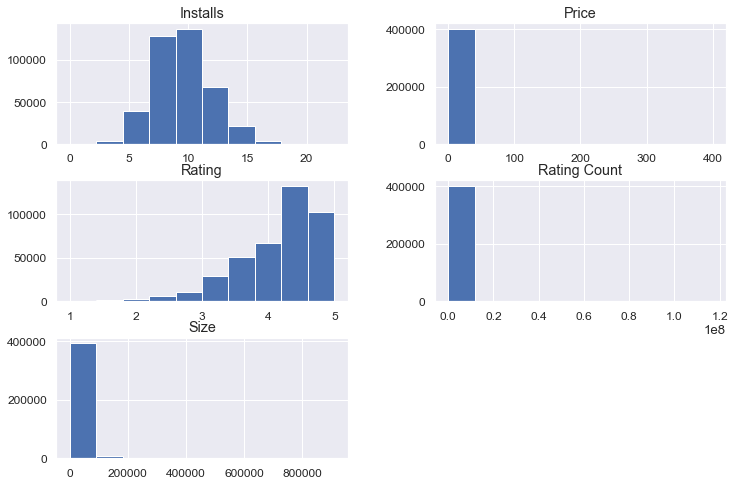

In [31]:
print(df.hist(['Rating','Rating Count','Size','Installs','Price'],figsize=(12,8),xlabelsize=12,ylabelsize=12))

In [32]:
df.Price=df.Price.apply(func=np.log1p)
df.Rating=df.Rating.apply(func=np.log1p)
df['Rating Count']=df['Rating Count'].apply(func=np.log1p)
df.Size=df.Size.apply(func=np.log1p)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399284 entries, 0 to 603046
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   App Name          399283 non-null  object        
 1   App Id            399284 non-null  object        
 2   Category          399284 non-null  object        
 3   Rating            399284 non-null  float64       
 4   Rating Count      399284 non-null  float64       
 5   Installs          399284 non-null  float64       
 6   Minimum Installs  399284 non-null  float64       
 7   Maximum Installs  399284 non-null  int64         
 8   Free              399284 non-null  category      
 9   Price             399284 non-null  float64       
 10  Currency          399284 non-null  object        
 11  Size              399284 non-null  float64       
 12  Minimum Android   398998 non-null  object        
 13  Released          399284 non-null  datetime64[ns]
 14  Last

In [34]:
df.to_csv('data.csv')
